# STOCK MARKET PREDICTION USING PRIOR KNOWLDEGE 

### Lớp Cao học Khoa học dữ liệu khoa Toán - Tin K30 - KHTN

### Nhóm 1 
1.   Hà Minh Tuấn          - 20C29041
2.   Nguyễn Thanh Thoại    - 20C29039
3.   Trần Ngọc Đăng Nguyên - 20C29011

[Github](https://github.com/DangNguyenTranNgoc/Stock-Market-Prediction-using-Prior-Knowledge)

In [ ]:
#coding: utf-8 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

%matplotlib inline

plt.style.use('seaborn-paper')

In [ ]:
# Define const
DATA_FOLDER = r'/content/drive/MyDrive/Data/stock-market-prediction/'

VNINDEX_FILE_CSV = os.path.abspath('{}{}vnindex.csv'.format(DATA_FOLDER, os.sep))
VNINDEX_FILE_PKL = os.path.abspath('{}{}vnindex.pkl'.format(DATA_FOLDER, os.sep))

SCORED_DATA = 'summary_data.csv'

## Preprocessing 'vnindex' data

In [ ]:
vnindex_raw = pd.read_csv(VNINDEX_FILE_CSV)
vnindex_raw.sample(5)

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>
1387,^VNINDEX,20151218,574.66,578.00,568.18,568.18,179088555,574.66,578.00,568.18,568.18,0,67027230,74403190
4406,^VNINDEX,20031029,133.27,133.27,133.22,133.22,32230,133.27,133.27,133.22,133.22,0,0,0
4844,^VNINDEX,20011224,248.05,248.05,248.05,248.05,174900,248.05,248.05,248.05,248.05,0,0,0
862,^VNINDEX,20180122,1066.86,1088.05,1066.61,1087.42,246215500,1066.86,1088.05,1066.61,1087.42,0,67069820,34522830
2570,^VNINDEX,20110323,464.00,467.96,463.96,467.64,27018860,464.00,467.96,463.96,467.64,0,3854850,2206130


In [ ]:
# Drop not need colunms, keep date and adjust close
drop_columns = ['<Ticker>', '<OpenFixed>', '<HighFixed>', '<LowFixed>', '<Volume>', '<Open>', 
                '<High>', '<Low>', '<Close>', '<VolumeDeal>', '<VolumeFB>', '<VolumeFS>']

vnindex = vnindex_raw.drop(columns=drop_columns, axis=1)
vnindex.sample(5)

,<DTYYYYMMDD>,<CloseFixed>
83,20210311,1181.73
4749,20020612,203.79
3032,20090519,400.90
1972,20130813,497.73
1456,20150914,562.17


In [ ]:
vnindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <DTYYYYMMDD>  5058 non-null   int64  
 1   <CloseFixed>  5058 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 79.2 KB


In [ ]:
# Change name of columns ...
vnindex.rename(columns={'<DTYYYYMMDD>': 'date','<CloseFixed>': 'CloseFixed'}, inplace=True)

# ... and date column is string. So, convert it to datetime.
vnindex['date'] = pd.to_datetime(vnindex['date'], format=r'%Y%m%d')

# Check info again
vnindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        5058 non-null   datetime64[ns]
 1   CloseFixed  5058 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 79.2 KB


5058 samples is too much, we just need 380 obs (equivalent to the period from 01/2019 - 07/2021)

In [ ]:
vnindex = vnindex.head(380)
vnindex

,date,CloseFixed
0,2021-07-09,1347.1400
1,2021-07-08,1374.6801
2,2021-07-07,1388.5500
3,2021-07-06,1354.7900
4,2021-07-05,1411.1300
...,...,...
375,2020-01-07,958.8800
376,2020-01-06,955.7900
377,2020-01-03,965.1400
378,2020-01-02,966.6700


## Plot the data

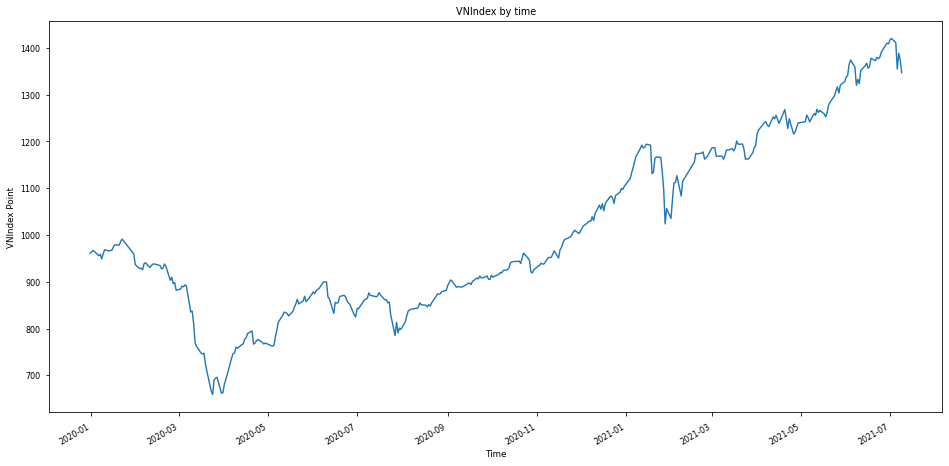

In [ ]:
vnindex.plot(x='date', y='CloseFixed', xlabel='Time', ylabel='VNIndex Point', 
            title='VNIndex by time', legend=False, figsize=(16,8))

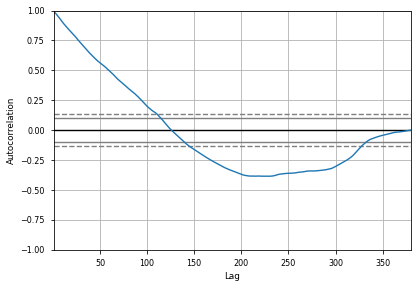

In [ ]:
# Plot autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(vnindex['CloseFixed'])

## ARIMA model


Try with default hyperparameters

In [ ]:
!pip install "statsmodels==0.11.1"

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Data prepare
X = vnindex['CloseFixed']
train_size = int(len(X) * 0.8)
train, test = X[:train_size], X[train_size:len(X)]

# Convert series data to list
history = [v for v in train]
test = [v for v in test]
prediction = list()

In [ ]:
# function plot results
def plot_evaluate(prediction, test):
    plt.plot(test, label='Real value')
    plt.plot(prediction, color='red', label='Predicted value')
    plt.legend()
    plt.show()

predicted=1043.956104, expected=773.910000
predicted=1043.070063, expected=768.920000
predicted=1042.174147, expected=766.840000
predicted=1041.277294, expected=794.970000
predicted=1040.477567, expected=789.600000
predicted=1039.665765, expected=780.700000
predicted=1038.830320, expected=777.220000
predicted=1037.989130, expected=767.410000
predicted=1037.121891, expected=765.790000
predicted=1036.255016, expected=757.940000
predicted=1035.368654, expected=760.330000
predicted=1034.495524, expected=748.020000
predicted=1033.588952, expected=746.690000
predicted=1032.683907, expected=736.750000
predicted=1031.753300, expected=701.800000
predicted=1030.718967, expected=680.230000
predicted=1029.623689, expected=662.530000
predicted=1028.480217, expected=662.260000
predicted=1027.342767, expected=696.060000
predicted=1026.317120, expected=694.210000
predicted=1025.292093, expected=690.250000
predicted=1024.261197, expected=659.210000
predicted=1023.141588, expected=666.590000
predicted=1

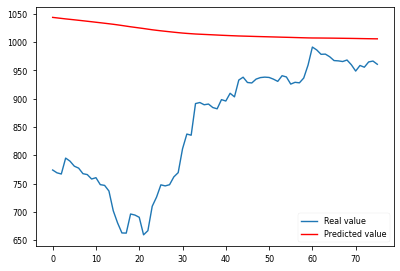

In [ ]:
# ARIMA with default hyperparameters
for t in range(len(test)):
	model = ARIMA(history)
	model_fit = model.fit()
	output = model_fit.forecast()
	y = output[0]
	prediction.append(y)
	obs = test[t]
	history.append(obs)
	print('predicted={:f}, expected={:f}'.format(y, obs))

# evaluate forecasts
rmse = mean_squared_error(y_true=test, y_pred=prediction, squared=False)
print('Test RMSE: {:.3f}'.format(rmse))

# plot forecasts against actual outcomes
plot_evaluate(prediction, test)

### Find the suitable hyperparameters

Using grid search with:

- Autoregressive (p_values): 0, 1, 2, 4, 6, 8, 10
- Differences (d_values): 0, 1, 2
- Moving Average (q_values): 0, 1, 2

In [ ]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.8)
    train, test = X[:train_size], X[train_size:]
    
    history = [v for v in train]
    test = [v for v in test]

    prediction = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        y = model_fit.forecast()[0]
        prediction.append(y)
        history.append(test[t])

    rmse = mean_squared_error(test, prediction, squared=False)
    
    return rmse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    print('Order: {} / RMSE: {}'.format(order, rmse))
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as ex:
                    print(ex)
                    continue
    
    print('Best ARIMA{} RMSE={:.3f}'.format(best_cfg, best_score))

Find the suitable hyperparameters

In [ ]:
# p_values = [0, 1, 2, 4, 6, 8]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(vnindex['CloseFixed'], p_values, d_values, q_values)

### Check the result

Test RMSE: 13.874


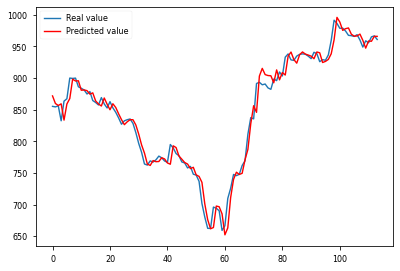

In [ ]:
X = vnindex['CloseFixed']
train_size = int(len(X) * 0.7)
train, test = X[:train_size], X[train_size:len(X)]

# Convert series to list
history = [v for v in train]
test = [v for v in test]
prediction = list()

# ARIMA
for t in range(len(test)):
	model = ARIMA(history, order=(6, 2, 1))
	model_fit = model.fit()
	output = model_fit.forecast()
	y = output[0]
	prediction.append(y)
	obs = test[t]
	history.append(obs)

# evaluate forecasts
rmse = mean_squared_error(y_true=test, y_pred=prediction, squared=False)
print('Test RMSE: {:.3f}'.format(rmse))

# plot forecasts against actual outcomes
plot_evaluate(prediction, test)

### Save the predicted score

In [ ]:
pred_df = vnindex.copy()
pred_df.drop(columns='CloseFixed', inplace=True)
pred_df['CloseFixed'] = history
pred_df
pred_df.to_csv('{}{}arima_pred.csv'.format(DATA_FOLDER, os.sep), index=False)